In [75]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
import pandas as pd

houses_full=pd.read_csv('../Dados/Melbourne_housing_FULL.csv')
houses=houses_full.dropna()
houses=houses.loc[houses['BuildingArea']<1500]
houses=houses.sample(1000,random_state=123)

houses.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
26843,Broadmeadows,30 Cuthbert St,4,h,605000.0,S,YPA,11/11/2017,14.0,3047.0,...,1.0,2.0,601.0,150.0,1960.0,Hume City Council,-37.68480,144.93340,Northern Metropolitan,4294.0
13927,Yarraville,2/150 Hyde St,2,u,650000.0,SP,Jas,13/05/2017,7.0,3013.0,...,2.0,2.0,0.0,92.0,1985.0,Maribyrnong City Council,-37.81610,144.89670,Western Metropolitan,6543.0
7633,Pascoe Vale,24 Alexandra St,3,h,731000.0,S,Brad,4/06/2016,9.9,3044.0,...,1.0,2.0,568.0,111.0,1960.0,Moreland City Council,-37.71780,144.94220,Northern Metropolitan,7485.0
15374,West Footscray,22 Hope St,3,h,1100000.0,S,Biggin,3/06/2017,6.4,3012.0,...,2.0,3.0,380.0,106.4,1945.0,Maribyrnong City Council,-37.79194,144.87144,Western Metropolitan,5058.0
17181,North Melbourne,72 Curzon St,2,h,1126000.0,SP,Nelson,27/05/2017,1.8,3051.0,...,1.0,0.0,114.0,65.0,1910.0,Melbourne City Council,-37.80248,144.94846,Northern Metropolitan,6821.0


(1000,)

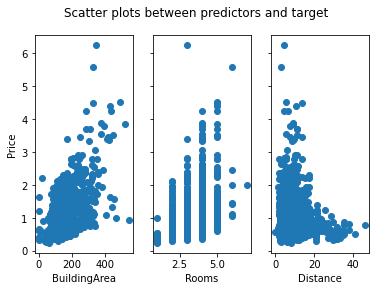

In [111]:
# separate the predictors as x
# transform the data frame into an numpy array
# this will facilitate slicing for plotting and ML
predictors=['BuildingArea','Rooms','Distance']
x=np.array(houses.loc[:,predictors])
y=np.array(houses.loc[:,'Price'])

def priceshrink(v,t):
    return int(v/1000000)

fig, sc = plt.subplots(1,len(predictors))
fig.suptitle('Scatter plots between predictors and target')
for i in range(len(predictors)):
    sc[i].scatter(x[:,i], y)
    sc[i].set(xlabel=predictors[i])
    sc[i].yaxis.set_major_formatter(plt.NullFormatter())
sc[0].set(ylabel='Price')
sc[0].yaxis.set_major_formatter(plt.FuncFormatter(priceshrink))
np.shape(y)

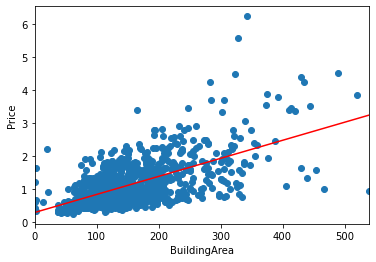

In [112]:
model = LinearRegression(fit_intercept=True)


model.fit(x[:,0:1], y)

xfit = np.linspace(0, max(x[:,0]), 1000)
# newaxis gives xfit the shape of a matrix
yfit = model.predict(xfit[:,np.newaxis])

# the building of the plot starts by defining an axes
# then you put the scatter plot on the axes
# you set a number of things on the axes
# etc.
# the build of the plot is axes centered
ax=plt.axes(label='lrfit')
ax.scatter(x[:,0], y)
ax.set_ylabel('Price')
ax.set_xlabel('BuildingArea')
ax.set_xlim(left=0)
ax.set_xlim(left=0,right=max(x[:,0]))
ax.yaxis.set_major_formatter(plt.FuncFormatter(priceshrink))
ax.plot(xfit, yfit,color='red')


In [98]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     5487.962267597321
Model intercept: 283793.64117072534


In [105]:
print("Model R2:    ", model.score(x[:,0:1],y))

Model R2:     0.38645218072864085


In [113]:
model.fit(x, y)
print("Predictors:",predictors)
print("Coefficients (alphas):    ", model.coef_)
print("Model intercept:", model.intercept_)
print("Model R2:    ", model.score(x,y))

Predictors: ['BuildingArea', 'Rooms', 'Distance']
Coefficients (alphas):     [  5096.81698113  85404.64073188 -36513.48538364]
Model intercept: 482938.626092975
Model R2:     0.5021785990606764


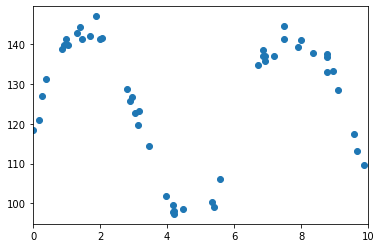

In [133]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = (np.sin(x) + 0.1 * rng.randn(50) +5)*24

ax=plt.axes(label='lrknn')
ax.set_xlim(0,10)
ax.scatter(x, y)


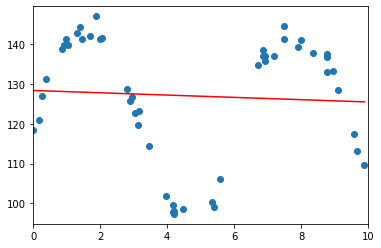

In [134]:
model.fit(x[:,np.newaxis],y[:,np.newaxis])
xfit = np.linspace(0, max(x), 1000)
# newaxis gives xfit the shape of a matrix
yfit = model.predict(xfit[:,np.newaxis])

ax=plt.axes(label='lrknn')
ax.set_xlim(0,10)
ax.scatter(x, y)
ax.plot(xfit, yfit,color='red')


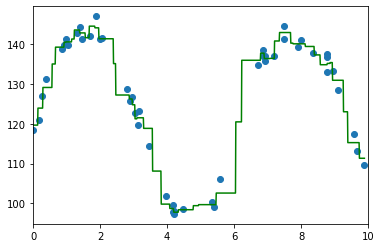

In [135]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x[:,np.newaxis], y)
yfitn=neigh.predict(xfit[:,np.newaxis])

ax=plt.axes(label='lrknn')
ax.set_xlim(0,10)
ax.scatter(x, y)
ax.plot(xfit, yfitn,color='green')
